In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style='ticks', context='paper', font_scale=1.5)

In [3]:
df = pd.read_excel('/Users/luke.thompson/singlecell/clusters/rsonly_stats.xlsx')
df

,sar3,sar4,pro3,pro4
Trad genomes,8,26,13,41
Non-RS SAGs,0,0,10,99
RS SAGs,21,21,5,5
All OGs,6506,5272,9328,10439
Red Sea-assoc. OGs,3373,878,1192,96


In [4]:
df2 = pd.DataFrame(df.iloc[-2:].stack())
df2.reset_index(inplace=True)
df2.columns = ['Set of OGs', 'clusters', 'count']
df2

,Set of OGs,clusters,count
0,All OGs,sar3,6506
1,All OGs,sar4,5272
2,All OGs,pro3,9328
3,All OGs,pro4,10439
4,Red Sea-assoc. OGs,sar3,3373
5,Red Sea-assoc. OGs,sar4,878
6,Red Sea-assoc. OGs,pro3,1192
7,Red Sea-assoc. OGs,pro4,96


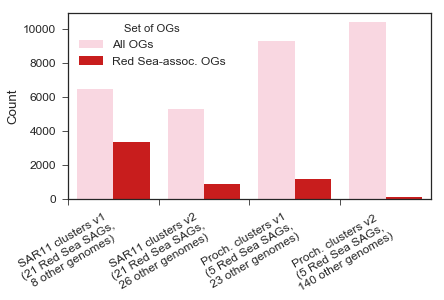

In [9]:
sns.barplot(data=df2, x='clusters', y='count', hue='Set of OGs', 
            palette=[sns.xkcd_rgb['light pink'], sns.xkcd_rgb['red']])
plt.ylabel('Count')
plt.xlabel('')
plt.xticks([-0.5, 0.5, 1.5, 2.5],
           ['SAR11 clusters v1\n(%s Red Sea SAGs,\n%s other genomes)' % (df.sar3['RS SAGs'], df.sar3['Trad genomes']+df.sar3['Non-RS SAGs']), 
            'SAR11 clusters v2\n(%s Red Sea SAGs,\n%s other genomes)' % (df.sar4['RS SAGs'], df.sar4['Trad genomes']+df.sar4['Non-RS SAGs']),  
            'Proch. clusters v1\n(%s Red Sea SAGs,\n%s other genomes)' % (df.pro3['RS SAGs'], df.pro3['Trad genomes']+df.pro3['Non-RS SAGs']),  
            'Proch. clusters v2\n(%s Red Sea SAGs,\n%s other genomes)' % (df.pro4['RS SAGs'], df.pro4['Trad genomes']+df.pro4['Non-RS SAGs'])], 
           rotation=30)
plt.tight_layout()
plt.savefig('/Users/luke.thompson/singlecell/plots/rsonly_counts.pdf')